In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from correlation_ansatzs import high_temp_correlation,low_temp_correlation,low_temp_correlation_1,critical_correlation,loglog
from HOTRGZ2 import get_lattice_size,get_dist_torus_2D
import matplotlib as mpl

with GILT
fitted parameters: [0.70224786 0.13003305]
fitted equation: 7.02e-01x^(-2 Δ),Δ=0.1300
without GILT
fitted parameters: [0.72560656 0.13126661]
fitted equation: 7.26e-01x^(-2 Δ),Δ=0.1313
with GILT, 00
fitted parameters: [0.65733225 0.22910154]
fitted equation: 6.57e-01x^(-2 Δ),Δ=0.2291
without GILT, 00
fitted parameters: [0.7400836  0.11651222]
fitted equation: 7.40e-01x^(-2 Δ),Δ=0.1165


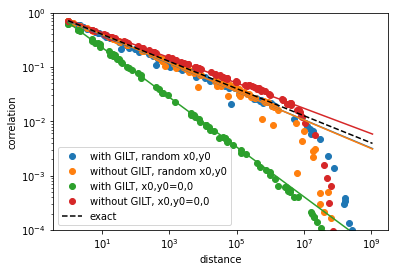

In [10]:
data1=pd.read_pickle('data/hotrg_gilt_X24_correlation.pkl')
data2=pd.read_pickle('data/hotrg_X24_correlation.pkl')
data3=pd.read_pickle('data/hotrg_gilt_X24_correlation_00.pkl')
data4=pd.read_pickle('data/hotrg_X24_correlation_00.pkl')

def process_data(data):
    lattice_size=get_lattice_size(60,spacial_dim=2)
    data['x']=data.apply(lambda row:row['x1']-row['x0'],axis=1)
    data['y']=data.apply(lambda row:row['y1']-row['y0'],axis=1)
    data['dist']=data.apply(lambda row:get_dist_torus_2D(row['x'],row['y'],lattice_size),axis=1)
    data['theta']=data.apply(lambda row:np.arctan2(row['y'],row['x']),axis=1)
    data=data.sort_values(by=['dist'])
    return data
data1=process_data(data1)
data2=process_data(data2)
data3=process_data(data3)
data4=process_data(data4)

def fit_data(data,ansatz):
    data_slice=data[(data['correlation']>1e-2)].sort_values('dist')
    p,cov=curve_fit(loglog(ansatz),np.log(data_slice['dist']),np.log(data_slice['correlation']),p0=ansatz.p0,maxfev=10000)
    print('fitted parameters:',p)
    print('fitted equation:',ansatz.eq.format(*p))
    return p,cov,ansatz

print('with GILT')
p1,cov1,ansatz1=fit_data(data1,critical_correlation)

print('without GILT')
p2,cov2,ansatz2=fit_data(data2,critical_correlation)

print('with GILT, 00')
p3,cov3,ansatz3=fit_data(data3,critical_correlation)

print('without GILT, 00')
p4,cov4,ansatz4=fit_data(data4,critical_correlation)

pexp=(0.71,0.125)

plt.figure(figsize=(6,4))

ls=np.geomspace(1,2**30)

plt.plot(data1['dist'],data1['correlation'],'o',label='with GILT, random x0,y0',color='C0')
plt.plot(data2['dist'],data2['correlation'],'o',label='without GILT, random x0,y0',color='C1')
plt.plot(data3['dist'],data3['correlation'],'o',label='with GILT, x0,y0=0,0',color='C2')
plt.plot(data4['dist'],data4['correlation'],'o',label='without GILT, x0,y0=0,0',color='C3')

plt.plot(ls,ansatz1(ls,*p1),'-',color='C0')
plt.plot(ls,ansatz2(ls,*p2),'-',color='C1')
plt.plot(ls,ansatz3(ls,*p3),'-',color='C2')
plt.plot(ls,ansatz4(ls,*p4),'-',color='C3')
plt.plot(ls,ansatz4(ls,*pexp),'--',color='black',label='exact')



plt.xscale('log')
plt.yscale('log')
plt.xlabel('distance')
plt.ylabel('correlation')
plt.ylim([1e-4,1])
plt.legend()
plt.show()


critical temperature
fitted parameters: [0.70224786 0.13003305]
fitted equation: 7.02e-01x^(-2 Δ),Δ=0.1300
high temperature
fitted parameters: [6.83511836e-01 2.06525368e+04 1.35546351e-01]
fitted equation: 6.84e-01e^(-x/ζ)/x^(2 Δ),ζ=2.07e+04,Δ=0.1355
low temperature
fitted parameters: [7.00562688e-01 1.95100231e+03 1.29427513e-01]
fitted equation: 7.01e-01(1/ζ+1/x)^(2 ∆),ζ=1.95e+03,∆=0.1294
with GILT


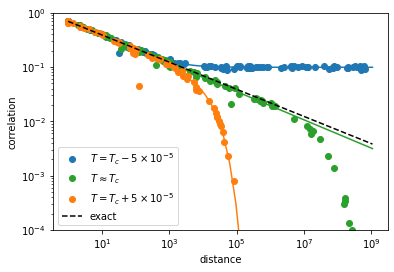

In [12]:
data1=pd.read_pickle('data/hotrg_gilt_X24_correlation.pkl')
data1=process_data(data1)
print('critical temperature')
p1,cov1,ansatz1=fit_data(data1,critical_correlation)
data2=pd.read_pickle('data/hotrg_gilt_X24_lowB_correlation.pkl')
data2=process_data(data2)
print('high temperature')
p2,cov2,ansatz2=fit_data(data2,high_temp_correlation)
data3=pd.read_pickle('data/hotrg_gilt_X24_highB_correlation.pkl')
data3=process_data(data3)
print('low temperature')
p3,cov3,ansatz3=fit_data(data3,low_temp_correlation_1)
pexp=(0.69,0.125)

print('with GILT')

ls=np.geomspace(1,2**30)

plt.figure(figsize=(6,4))
plt.plot(ls,ansatz3(ls,*p3),'-',color='tab:blue')
plt.plot(ls,ansatz1(ls,*p1),'-',color='tab:green')
plt.plot(ls,ansatz2(ls,*p2),'-',color='tab:orange')
plt.plot(data3['dist'],data3['correlation'],'o',label=r'$T=T_c-5\times10^{-5}$',color='tab:blue')
plt.plot(data1['dist'],data1['correlation'],'o',label=r'$T \approx T_c$',color='tab:green')
plt.plot(data2['dist'],data2['correlation'],'o',label=r'$T=T_c+5\times10^{-5}$',color='tab:orange')
plt.plot(ls,ansatz4(ls,*pexp),'--',color='black',label='exact')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('distance')
plt.ylabel('correlation')
plt.ylim([1e-4,1])
plt.legend()
plt.show()

